# ANN for Handwritten Number Recognition MNIST
### By: Jeremy Rico
### UNIQUIFY

This program uses tensorflow keras to create a sequential model to classify handwritten numbers. The data set used is the MNIST dataset whih consists of over 60,000 training samples.

### Import libraries

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras import Model

### Load Data



In [121]:
# Load dataset
mnist = tf.keras.datasets.mnist

# Split into train and test 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Regularize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

### Shuffle and split data

In [122]:
# Shuffle and split the data into batches
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

### Class definition

In [123]:
# Creation of sequential model
#   comment: tried dropout, but highest accuracy was achieved without it
class MyModel(Model):

  # initializer
  def __init__(self):
    super(MyModel, self).__init__()
    self.seq1 = Sequential()
    self.d1 = Dense(128, activation='relu')
    self.flatten = Flatten()
    #self.drop = Dropout(0.10)
    self.d2 = Dense(10)

  def call(self, x):
    x = self.seq1(x)
    x = self.flatten(x)
    x = self.d1(x)
    #x = self.drop(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

### Define metrics

In [124]:
# define loss and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [125]:
# select accuracy and loss metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### Training step function

In [126]:
# Create function to train model using gradient tape
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    #training=True 
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

### Test step function

In [127]:
# Create funtion to test the model
@tf.function
def test_step(images, labels):
  #training=False
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

### Model training

In [128]:
# Define epochs here
EPOCHS = 20
# history is used to store metrics while the model is trained
history = {'train_acc': [], 'train_loss': [], 'test_acc': [], 'test_loss': []}

# Train and fit the model
for epoch in range(EPOCHS):
  # Reset metrics for each epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  # call train function
  for images, labels in train_ds:
    train_step(images, labels)

  # call test function
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  # print metrics
  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result()}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result()}'
  )
  
  # store metrics in history
  history['train_loss'].append(train_loss.result())
  history['train_acc'].append(train_accuracy.result())
  history['test_loss'].append(test_loss.result())
  history['test_acc'].append(test_accuracy.result())

Epoch 1, Loss: 0.2626590132713318, Accuracy: 0.9250500202178955, Test Loss: 0.14835307002067566, Test Accuracy: 0.957099974155426
Epoch 2, Loss: 0.11836730688810349, Accuracy: 0.963949978351593, Test Loss: 0.10231953114271164, Test Accuracy: 0.9693999886512756
Epoch 3, Loss: 0.0823543444275856, Accuracy: 0.9749833345413208, Test Loss: 0.08575169742107391, Test Accuracy: 0.972599983215332
Epoch 4, Loss: 0.061456140130758286, Accuracy: 0.981333315372467, Test Loss: 0.08868523687124252, Test Accuracy: 0.9739999771118164
Epoch 5, Loss: 0.04741443693637848, Accuracy: 0.9851499795913696, Test Loss: 0.07808160036802292, Test Accuracy: 0.9753000140190125
Epoch 6, Loss: 0.03770831227302551, Accuracy: 0.9880499839782715, Test Loss: 0.08081885427236557, Test Accuracy: 0.9758999943733215
Epoch 7, Loss: 0.029365461319684982, Accuracy: 0.9909499883651733, Test Loss: 0.07748842239379883, Test Accuracy: 0.9772999882698059
Epoch 8, Loss: 0.023517386987805367, Accuracy: 0.992816686630249, Test Loss: 0.0

### Results

In [129]:
print("Training accuracy after %d epochs: %f%%" % (EPOCHS, history['train_acc'][-1] * 100))
print("Test accuracy after %d epochs: %f%%" % (EPOCHS, history['test_acc'][-1] * 100))
print("Training loss after %d epochs: %f%%" % (EPOCHS, history['train_loss'][-1] * 100))
print("Test loss after %d epochs: %f%%" % (EPOCHS, history['test_loss'][-1] * 100))

Training accuracy after 20 epochs: 99.828331%
Test accuracy after 20 epochs: 97.779999%
Training loss after 20 epochs: 0.601049%
Test loss after 20 epochs: 12.082883%


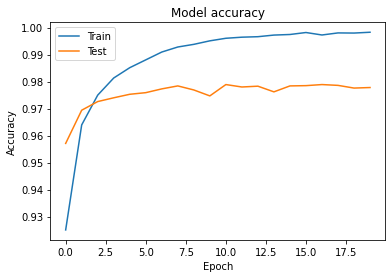

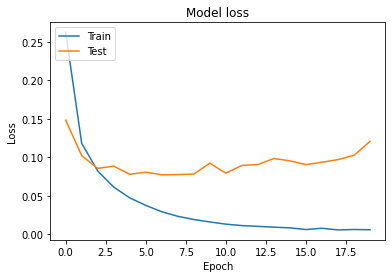

In [130]:
# Plot training accuracy & loss values
plt.plot(range(EPOCHS), history['train_acc'])
plt.plot(range(EPOCHS), history['test_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot test accuracy and loss values
plt.plot(range(EPOCHS), history['train_loss'])
plt.plot(range(EPOCHS), history['test_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()